17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - accuracy: 0.5640 - loss: 0.6659 - val_accuracy: 0.7244 - val_loss: 0.5502
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.8349 - loss: 0.3836 - val_accuracy: 0.8256 - val_loss: 0.4177
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9149 - loss: 0.2232 - val_accuracy: 0.7430 - val_loss: 0.6468
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9694 - loss: 0.0894 - val_accuracy: 0.7450 - val_loss: 0.7986
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9900 - loss: 0.0317 - val_accuracy: 0.7868 - val_loss: 0.9368
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7860 - loss: 0.9502
Test Accuracy: 0.79


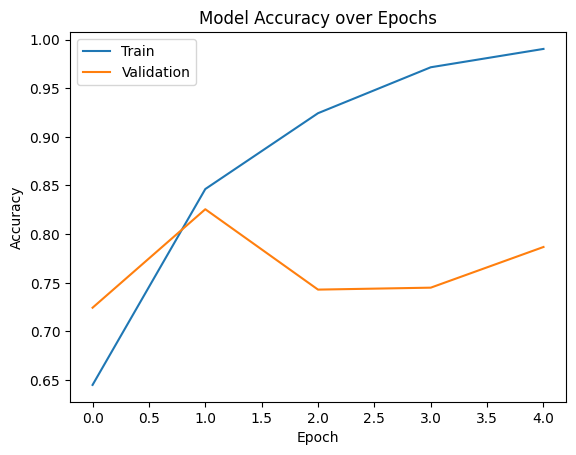

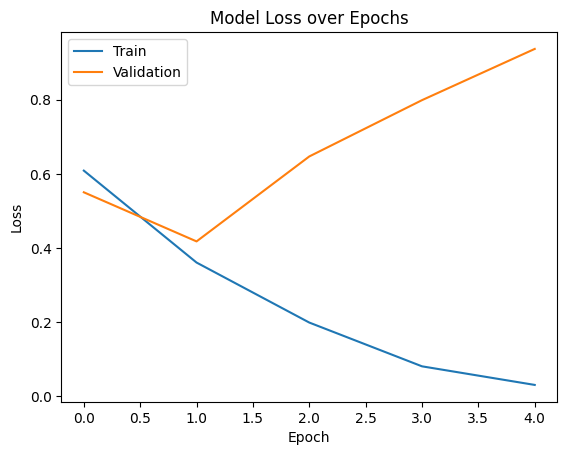

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
Predicted Sentiment: Positive


In [1]:
# 1. Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence

# 2. Set parameters
max_features = 10000
maxlen = 500

# 3. Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 4. Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# 5. Build RNN model with hidden layers
model = Sequential()

# Embedding layer
model.add(Embedding(max_features, 32))

# First RNN layer (returns full sequence so next RNN can read it)
# If you want only one RNN layer, delete 'return_sequences=True'
# model.add(SimpleRNN(32, return_sequences=True))   # OPTIONAL second RNN layer

# Main RNN layer
model.add(SimpleRNN(32))

#  Added HIDDEN LAYERS
model.add(Dense(64, activation='relu'))   # Hidden Layer 1
model.add(Dense(32, activation='relu'))   # Hidden Layer 2

# Output layer
model.add(Dense(1, activation='sigmoid'))

# 6. Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 7. Train model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# 8. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# 9. Plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 10. Predict sample review
sample_review = x_test[0]
sample_review_input = np.expand_dims(sample_review, axis=0)
prediction = model.predict(sample_review_input)[0][0]

if prediction > 0.5:
    print("Predicted Sentiment: Positive")
else:
    print("Predicted Sentiment: Negative")

Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.5208 - loss: 0.6888 - precision: 0.5285 - recall: 0.5101 - val_accuracy: 0.7020 - val_loss: 0.5705 - val_precision: 0.7253 - val_recall: 0.6383
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7883 - loss: 0.4558 - precision: 0.7756 - recall: 0.8212 - val_accuracy: 0.6248 - val_loss: 0.6605 - val_precision: 0.6262 - val_recall: 0.5958
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9246 - loss: 0.2014 - precision: 0.9259 - recall: 0.9222 - val_accuracy: 0.7048 - val_loss: 0.7798 - val_precision: 0.6700 - val_recall: 0.7926
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9866 - loss: 0.0396 - precision: 0.9870 - recall: 0.9860 - val_accuracy: 0.7434 - val_loss: 1.0025 - val_precision: 0.7521 - val_recall: 0.7165
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9960 - loss: 0.0119 - precision: 0.9959 - recall: 0.9961 - val_accuracy: 0.7130 - val_los

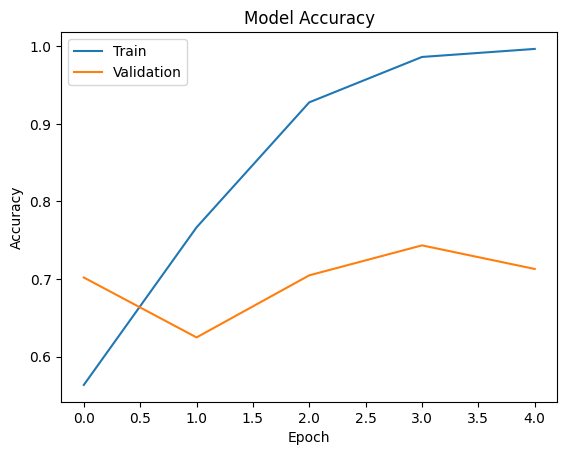

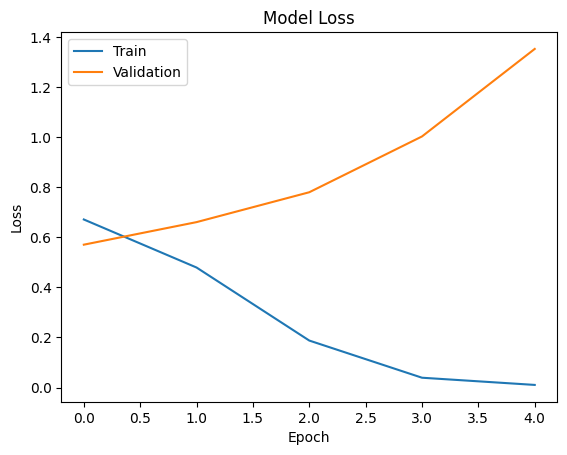

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
Prediction Score: 0.03684633
Predicted Sentiment: ❌ Negative


In [4]:
# 1. Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# 2. Set parameters
MAX_FEATURES = 15000   # ✅ increased maximum features
MIN_FEATURES = 100     # ✅ minimum feature frequency (via skip_top)
MAXLEN = 500
THRESHOLD = 0.7        # ✅ changed threshold value

# 3. Load IMDB data
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=MAX_FEATURES,
    skip_top=MIN_FEATURES   # ✅ removes very frequent words
)

# 4. Pad sequences
x_train = sequence.pad_sequences(x_train, maxlen=MAXLEN)
x_test = sequence.pad_sequences(x_test, maxlen=MAXLEN)

# 5. Build RNN model
model = Sequential()

# Embedding layer
model.add(Embedding(MAX_FEATURES, 32))

# RNN layer
model.add(SimpleRNN(30))

# Hidden Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# 6. Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'recall', 'precision']
)

# 7. Train model
history = model.fit(
    x_train,
    y_train,
    epochs=5,
    batch_size=50,
    validation_split=0.2
)

# 8. Evaluate model
test_loss, test_acc, test_recall, test_precision = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test Precision: {test_precision:.2f}")

# 9. Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 10. Predict sample review with NEW threshold
sample_review = x_test[0]
sample_review_input = np.expand_dims(sample_review, axis=0)

prediction = model.predict(sample_review_input)[0][0]
print("Prediction Score:", prediction)

if prediction > THRESHOLD:
    print("Predicted Sentiment: ✅ Positive")
else:
    print("Predicted Sentiment: ❌ Negative")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

🚀 Training LSTM Model
Epoch 1/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - Precision: 0.6065 - Recall: 0.4623 - accuracy: 0.5781 - loss: 0.6605 - val_Precision: 0.7873 - val_Recall: 0.7481 - val_accuracy: 0.7758 - val_loss: 0.4812
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - Precision: 0.8345 - Recall: 0.8546 - accuracy: 0.8425 - loss: 0.3669 - val_Precision: 0.8501 - val_Recall: 0.8708 - val_accuracy: 0.8604 - val_loss: 0.3380
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - Precision: 0.9019 - Recall: 0.9012 - accuracy: 0.9007 - loss: 0.2509 - val_Precision: 0.8556 - val_Recall: 0.8736 - val_accuracy: 0.8648 - val_loss: 0.3256
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - Precision: 0.9331 - Recall: 0.9434 - accuracy: 0.9379 - loss: 0.1678 - val_Precision: 0.8508 - val_Recall: 0.8801 - val_accuracy: 0.8646 - val_loss: 0.3407
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - Precision: 0.9603 - Recall: 0.9

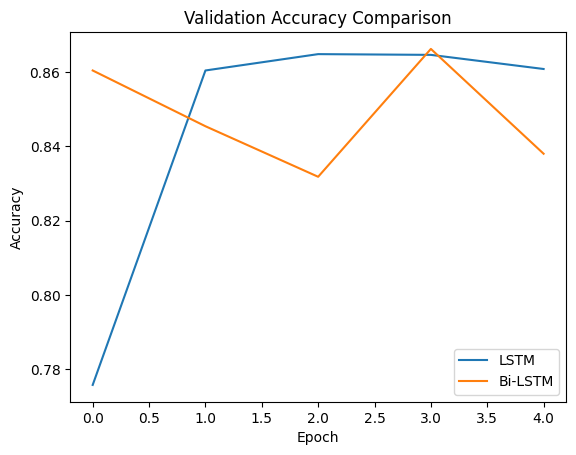

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step

🔍 Sample Prediction Score: 0.18108709
Predicted Sentiment: ❌ Negative


In [1]:
# =========================================
# 1. Import Libraries
# =========================================
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing import sequence

# =========================================
# 2. Parameters
# =========================================
MAX_FEATURES = 15000
MIN_FEATURES = 100
MAXLEN = 500
THRESHOLD = 0.7
EPOCHS = 5
BATCH_SIZE = 50

# =========================================
# 3. Load & Preprocess Data
# =========================================
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=MAX_FEATURES,
    skip_top=MIN_FEATURES
)

x_train = sequence.pad_sequences(x_train, maxlen=MAXLEN)
x_test = sequence.pad_sequences(x_test, maxlen=MAXLEN)

# =========================================
# 4. Function to build & train model
# =========================================
def train_model(model, name):
    print(f"\n🚀 Training {name} Model")

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'Recall', 'Precision']
    )

    history = model.fit(
        x_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=0.2,
        verbose=1
    )

    results = model.evaluate(x_test, y_test, verbose=0)

    print(f"\n✅ {name} Test Results")
    print(f"Accuracy : {results[1]:.2f}")
    print(f"Recall   : {results[2]:.2f}")
    print(f"Precision: {results[3]:.2f}")

    return model, history

# =========================================
# 5. LSTM Model
# =========================================
lstm_model = Sequential([
    Embedding(MAX_FEATURES, 32),
    LSTM(30),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

lstm_model, lstm_history = train_model(lstm_model, "LSTM")

# =========================================
# 6. Bi-Directional LSTM Model
# =========================================
bilstm_model = Sequential([
    Embedding(MAX_FEATURES, 32),
    Bidirectional(LSTM(30)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

bilstm_model, bilstm_history = train_model(bilstm_model, "Bi-LSTM")

# =========================================
# 7. Accuracy Comparison Plot
# =========================================
plt.plot(lstm_history.history['val_accuracy'], label='LSTM')
plt.plot(bilstm_history.history['val_accuracy'], label='Bi-LSTM')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# =========================================
# 8. Prediction using Bi-LSTM (Best Model)
# =========================================
sample_review = np.expand_dims(x_test[0], axis=0)
prediction = bilstm_model.predict(sample_review)[0][0]

print("\n🔍 Sample Prediction Score:", prediction)
print("Predicted Sentiment:",
      "✅ Positive" if prediction > THRESHOLD else "❌ Negative")
